In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import pandas as pd
df = pd.read_csv('cleaned_rain_forecasting (1).csv')
df.head()

,date,location,mintemp,maxtemp,humidity9am,humidity3pm,pressure9am,pressure3pm,windspeed9am,windspeed3pm,raintoday,raintomorrow,year,month
0,2025-01-01,Mumbai,20.6,28.7,67,37,1001.4,1007.0,10,13,No,No,2025,1
1,2025-01-02,New Delhi,29.3,35.8,46,34,1008.3,1005.7,10,5,No,No,2025,1
2,2025-01-03,Mumbai,26.0,42.5,74,89,1009.6,998.9,16,23,Yes,Yes,2025,1
3,2025-01-04,Kolkata,24.0,39.6,94,38,1010.6,1002.3,16,9,No,No,2025,1
4,2025-01-05,New Delhi,17.3,41.1,67,30,1005.6,999.4,14,23,Yes,No,2025,1


In [ ]:
df.describe()

,mintemp,maxtemp,humidity9am,humidity3pm,pressure9am,pressure3pm,windspeed9am,windspeed3pm,year,month
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,22.354000,35.138900,69.963000,59.654000,1007.544700,1005.403900,14.403000,14.501000,2025.905000,6.107000
std,4.380177,5.845255,17.258084,17.378443,4.244161,4.331279,5.756886,5.711446,0.791582,3.306128
min,15.100000,25.100000,40.000000,30.000000,1000.000000,998.000000,5.000000,5.000000,2025.000000,1.000000
25%,18.575000,29.800000,56.000000,45.000000,1004.000000,1001.700000,9.000000,10.000000,2025.000000,3.000000
50%,22.450000,35.400000,70.500000,59.000000,1007.700000,1005.400000,14.000000,15.000000,2026.000000,6.000000
75%,26.200000,40.200000,85.000000,75.000000,1011.200000,1009.125000,19.250000,20.000000,2027.000000,9.000000
max,30.000000,45.000000,99.000000,89.000000,1015.000000,1013.000000,24.000000,24.000000,2027.000000,12.000000


In [ ]:
df.columns

Index(['date', 'location', 'mintemp', 'maxtemp', 'humidity9am', 'humidity3pm',
       'pressure9am', 'pressure3pm', 'windspeed9am', 'windspeed3pm',
       'raintoday', 'raintomorrow', 'year', 'month'],
      dtype='object')

In [ ]:
df.isnull().sum()

,0
date,0
location,0
mintemp,0
maxtemp,0
humidity9am,0
humidity3pm,0
pressure9am,0
pressure3pm,0
windspeed9am,0
windspeed3pm,0


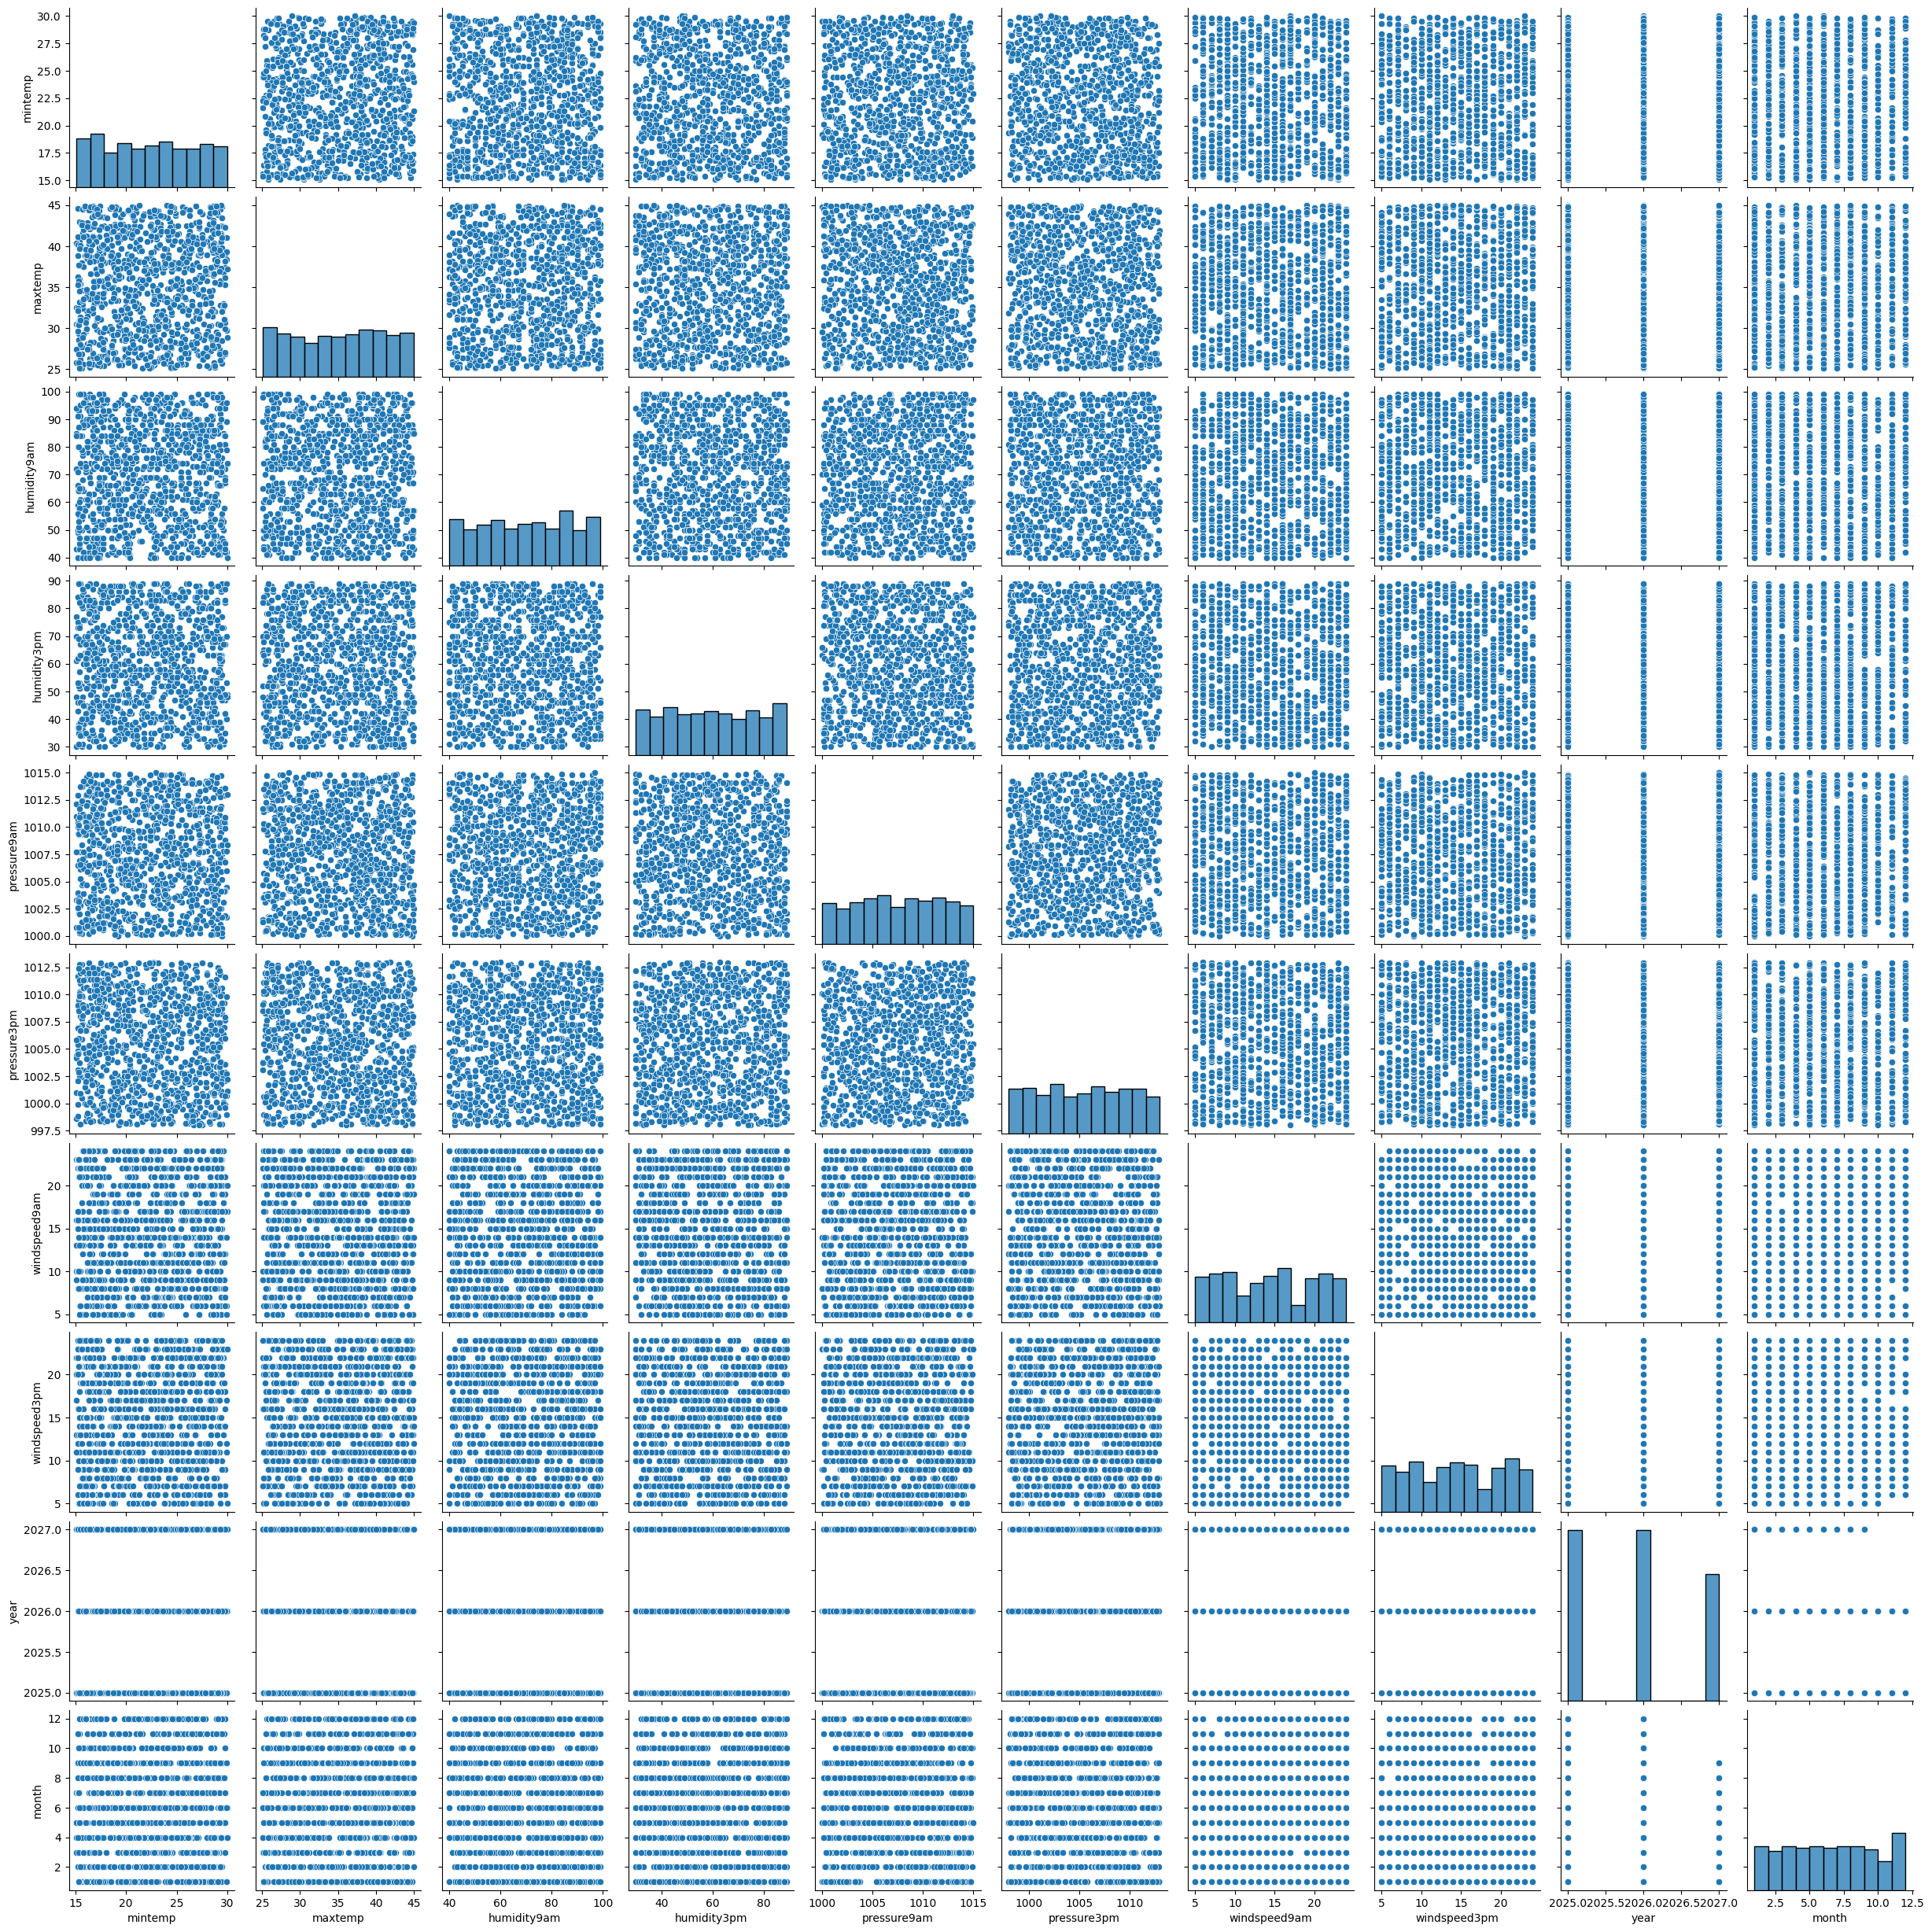

In [ ]:
sns.pairplot(df)


<Axes: xlabel='maxtemp', ylabel='Count'>

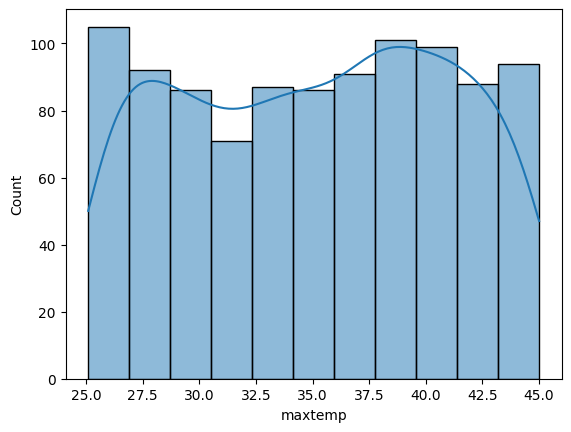

In [ ]:
sns.histplot(df['maxtemp'],kde=True)

<Axes: xlabel='maxtemp', ylabel='humidity3pm'>

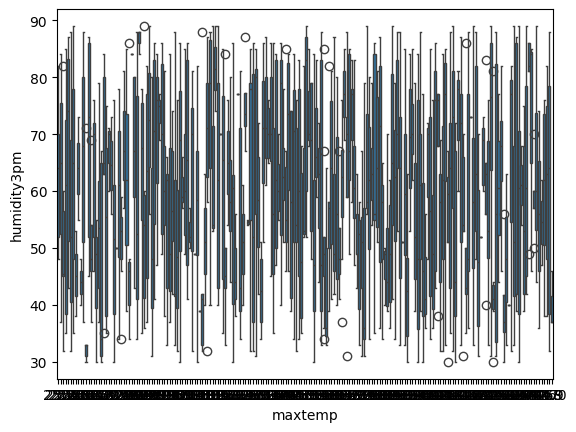

In [ ]:
sns.boxplot(x=df['maxtemp'], y=df['humidity3pm'])

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split

df = pd.read_csv('cleaned_rain_forecasting (1).csv')

label_cols = ['location', 'raintoday', 'raintomorrow']
le = LabelEncoder()

for col in label_cols:
    df[col] = le.fit_transform(df[col])

df['date'] = pd.to_datetime(df['date'])
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day
df.drop('date', axis=1, inplace=True)

x = df.drop(columns=['raintoday'])
y = df['raintoday']

scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x)

x_scaled

array([[0.75      , 0.36912752, 0.18090452, ..., 0.        , 0.        ,
        0.        ],
       [1.        , 0.95302013, 0.53768844, ..., 0.        , 0.        ,
        0.03333333],
       [0.75      , 0.73154362, 0.87437186, ..., 0.        , 0.        ,
        0.06666667],
       ...,
       [1.        , 0.13422819, 0.06532663, ..., 1.        , 0.72727273,
        0.8       ],
       [0.        , 0.95302013, 0.05025126, ..., 1.        , 0.72727273,
        0.83333333],
       [0.        , 0.44295302, 0.27638191, ..., 1.        , 0.72727273,
        0.86666667]])

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report


X_train,X_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 42)
models = {
    'KNN':KNeighborsClassifier(),
     'LogisticRegression':LogisticRegression(),
     'SVC':SVC(),
     'RandomForestClassifier':RandomForestClassifier(),
     'GradientBoostingClassifier':GradientBoostingClassifier()
} #we used  dictionary in it the object and the model

results = {}

for name , model in models.items():
    pipe = Pipeline([
        ('scaler',StandardScaler()),
        ('encoder',OneHotEncoder(handle_unknown='ignore')), # Added handle_unknown to avoid errors with unseen categories
        ('model',model)
    ])
    pipe.fit(X_train,y_train)
    y_pred = pipe.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    results[name] = accuracy
    print(f"{name} Accuracy: {accuracy:.4f} ")
    print(classification_report(y_test,y_pred))

KNN Accuracy: 0.5650 
              precision    recall  f1-score   support

           0       0.53      0.68      0.59        93
           1       0.62      0.47      0.53       107

    accuracy                           0.56       200
   macro avg       0.57      0.57      0.56       200
weighted avg       0.58      0.56      0.56       200

LogisticRegression Accuracy: 0.5600 
              precision    recall  f1-score   support

           0       0.52      0.65      0.58        93
           1       0.61      0.49      0.54       107

    accuracy                           0.56       200
   macro avg       0.57      0.57      0.56       200
weighted avg       0.57      0.56      0.56       200

SVC Accuracy: 0.6000 
              precision    recall  f1-score   support

           0       0.54      0.85      0.66        93
           1       0.75      0.38      0.51       107

    accuracy                           0.60       200
   macro avg       0.65      0.62      0.59    

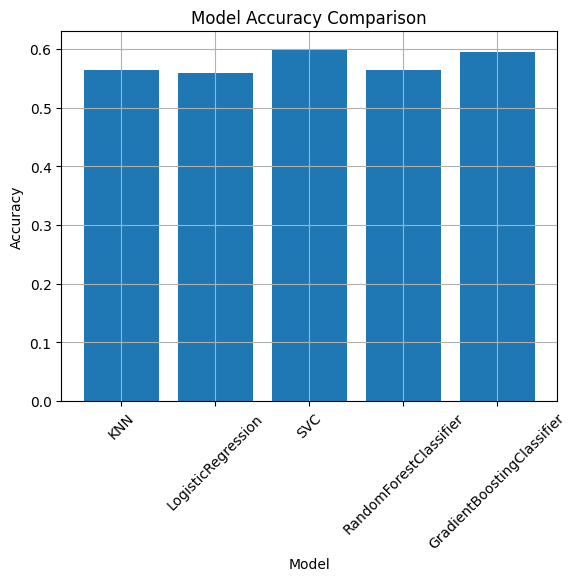

In [ ]:
import matplotlib.pyplot as plt
plt.bar(results.keys(),results.values())
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison')
plt.xticks(rotation=45)
plt.grid(True)
plt.show() # here the model accuracy is for SVC so we can do the SVC

In [22]:
!pip install pyngrok
!ngrok config add-authtoken 30AtDqZ0tH4pbPElru1PujjIJZk_78iRdXv1vuwDjn6CRGTr5

Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml


In [23]:
!pip install streamlit pyngrok scikit-learn -q
!pkill -f streamlit || true


^C


In [24]:
%%writefile app.py
import time
import numpy as np
import pandas as pd
import streamlit as st
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

st.set_page_config(page_title="Aqua Mage – MVP", layout="wide")
st.title("💧 Aqua Mage – MVP")
st.caption("AI-powered tank monitoring and rainfall forecast.")

# Sidebar inputs
st.sidebar.header("Settings")
tank_capacity = st.sidebar.number_input("Tank Capacity (L)", min_value=100, value=5000, step=100)
current_level = st.sidebar.number_input("Current Water Level (L)", min_value=0, max_value=tank_capacity, value=2500, step=50)
avg_daily = st.sidebar.number_input("Avg Daily Consumption (L/day)", min_value=1, value=300, step=10)
catchment_area = st.sidebar.number_input("Catchment Area (m²)", min_value=0.0, value=50.0, step=1.0)
runoff_coeff = st.sidebar.slider("Runoff Coefficient", 0.1, 1.0, 0.8, 0.05)

# Calculated values
level_pct = round((current_level / max(1, tank_capacity)) * 100, 1)
days_left = round(current_level / max(1, avg_daily), 1)

c1, c2, c3, c4 = st.columns(4)
c1.metric("Tank Capacity", f"{tank_capacity:,} L")
c2.metric("Current Level", f"{current_level:,} L")
c3.metric("Level %", f"{level_pct}%")
c4.metric("Days Remaining", f"{days_left}")

st.progress(min(1.0, level_pct / 100))

# Forecast logic
st.subheader("AI Rainfall Forecast")
h = st.slider("Forecast horizon (days)", 1, 7, 3)
if st.button("🔮 Generate Forecast"):
    with st.spinner("Predicting..."):
        time.sleep(0.8)
        rng = np.random.default_rng(42)
        base_rain = 5 + (current_level / max(1, tank_capacity)) * 5
        rain = np.maximum(0, rng.normal(base_rain, 1.5, size=h)).round(1)

        df = pd.DataFrame({"day": [f"D+{i+1}" for i in range(h)], "rain_mm": rain})
        st.dataframe(df)
        st.bar_chart(df.set_index("day"))

        yield_l = float(rain.sum()) * catchment_area * runoff_coeff
        st.success(f"Expected collection: ~{int(yield_l):,} L over {h} day(s)")
        st.info("🌦 AI predicts moderate rainfall in the next 3 days.")

# Leak detection with SVC
st.subheader("AI-based Leak Detection")
rng = np.random.default_rng(11)
usage = np.clip(rng.normal(avg_daily, avg_daily * 0.1, 14), 1, None).round()
usage[8] += avg_daily * 0.9  # Inject anomaly

labels = (usage > avg_daily * 1.5).astype(int)
scaler = StandardScaler()
X = scaler.fit_transform(usage.reshape(-1, 1))
clf = SVC(kernel="linear")
clf.fit(X, labels)

preds = clf.predict(X)
dfu = pd.DataFrame({
    "day": [f"D-{13 - i}" for i in range(14)],
    "usage_litres": usage.astype(int),
    "leak": preds
})
st.line_chart(dfu.set_index("day")[["usage_litres"]])

leak_days = dfu[dfu["leak"] == 1]["day"].tolist()
if leak_days:
    st.error(f"🚨 AI predicts leaks on: {', '.join(leak_days)}")
else:
    st.success("✅ No leaks predicted.")

if current_level > tank_capacity:
    st.warning("⚠️ Leaks likely: current level exceeds tank capacity!")


Overwriting app.py


In [32]:
!streamlit run app.py &>/dev/null &



In [33]:
from pyngrok import ngrok

# Kill all existing tunnels (optional but useful)
ngrok.kill()

# Open a new tunnel to your Streamlit app (or other local port)
public_url = ngrok.connect(8501)

print("Streamlit app is live at:", public_url)


Streamlit app is live at: NgrokTunnel: "https://0a37c5c93208.ngrok-free.app" -> "http://localhost:8501"
